# Feature Engineering

This notebook is going to look at the New York 2019 airbnb dataset to perform data cleaning and modification through analysis to ensure that the data is ml model ready. The objective is to find features that can be used to predict airbnb pricing for a given geographic location.

In [75]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's read in the dataset for airbnb

In [76]:
df = pd.read_csv("listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20220312074014,2022-03-13,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,...,4.81,4.73,4.78,NaN,f,1,1,0,0,3.69
1,5769,https://www.airbnb.com/rooms/5769,20220312074014,2022-03-31,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,...,4.94,4.74,4.92,NaN,f,1,0,1,0,1.81
2,6413,https://www.airbnb.com/rooms/6413,20220312074014,2022-03-31,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,https://www.airbnb.com/users/show/13879,...,4.98,4.86,4.94,NaN,t,1,1,0,0,0.78
3,6448,https://www.airbnb.com/rooms/6448,20220312074014,2022-03-12,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,https://www.airbnb.com/users/show/14156,...,4.97,4.97,4.89,NaN,t,1,1,0,0,2.09
4,8502,https://www.airbnb.com/rooms/8502,20220312074014,2022-03-13,Woodland Studio Lodging,<b>The space</b><br />Fully furnished suite wi...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,https://www.airbnb.com/users/show/25298,...,4.86,4.64,4.57,NaN,f,1,1,0,0,0.33


In [77]:
df.shape

(11972, 74)

In [78]:
#Get the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11972 non-null  int64  
 1   listing_url                                   11972 non-null  object 
 2   scrape_id                                     11972 non-null  int64  
 3   last_scraped                                  11972 non-null  object 
 4   name                                          11972 non-null  object 
 5   description                                   11808 non-null  object 
 6   neighborhood_overview                         7059 non-null   object 
 7   picture_url                                   11971 non-null  object 
 8   host_id                                       11972 non-null  int64  
 9   host_url                                      11972 non-null 

Let's do a subset of the columns (exclude the ones that are irrelevant to our query)

In [79]:
df_subset = df.loc[:, ~df.columns.isin(['id', 'listing_url', 'scrape_id', 'last_scraped', 'host_id', 'host_url', 'picture_url', 'host_picture_url', 'host_thumbnail_url', 'calendar_last_scraped', 'first_review', 'license', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_verifications', 'availability_60', 'availability_90', 'availability_365', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'])]
df_subset.head()

,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,Sylvia,2009-02-16,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner o...,within an hour,100%,94%,...,4.83,4.87,4.85,4.89,4.81,4.73,4.78,f,1,3.69
1,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,Elizabeth,2009-02-19,"Austin, Texas, United States",We're easygoing professionals that enjoy meeti...,NaN,NaN,100%,...,4.90,4.90,4.86,4.91,4.94,4.74,4.92,f,1,1.81
2,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,Todd,2009-04-17,"Austin, Texas, United States","We're a young family that likes to travel, we ...",within an hour,100%,100%,...,4.97,4.99,4.99,4.99,4.98,4.86,4.94,t,1,0.78
3,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,Amy,2009-04-20,"Austin, Texas, United States","We are a family of four (with teenagers, all o...",within an hour,100%,98%,...,4.97,4.97,4.96,4.99,4.97,4.97,4.89,t,1,2.09
4,Woodland Studio Lodging,<b>The space</b><br />Fully furnished suite wi...,NaN,Karen,2009-07-11,"Austin, Texas, United States",I handle the reservations at the studio on the...,within a day,83%,29%,...,4.53,4.49,4.67,4.83,4.86,4.64,4.57,f,1,0.33


In [80]:
#Viewing the number of null values per column
df_subset.isnull().sum()

name                                 0
description                        164
neighborhood_overview             4913
host_name                            3
host_since                           3
host_location                       18
host_about                        4679
host_response_time                3449
host_response_rate                3449
host_acceptance_rate              2862
host_is_superhost                    3
host_neighbourhood                1718
host_listings_count                  3
host_total_listings_count            3
host_has_profile_pic                 3
host_identity_verified               3
neighbourhood                     4913
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms_text                      16
bedrooms                           711
beds                     

In [81]:
df_subset = df_subset.dropna(subset=['host_name', 'maximum_minimum_nights'])

In [82]:
df_subset.isna().sum()

name                                 0
description                        163
neighborhood_overview             4909
host_name                            0
host_since                           0
host_location                       15
host_about                        4676
host_response_time                3445
host_response_rate                3445
host_acceptance_rate              2859
host_is_superhost                    0
host_neighbourhood                1715
host_listings_count                  0
host_total_listings_count            0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood                     4909
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms_text                      15
bedrooms                           710
beds                     

Looking at some of the data for our "boolean" values they appear to be characters of either 't' or 'f' for true and false respectively. Let's change those to be 0 or 1 for the ml models.

In [83]:
#Convert t/f values in the columns to 0/1
boolean_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'has_availability']
# df_subset[boolean_cols] = df_subset[boolean_cols].apply(lambda x: 0 if x == 'f' else 1)
for col in boolean_cols:
    df_subset[col] = df_subset[col].apply(lambda x: 0 if x == 'f' else 1)
df_subset.head()

,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,Sylvia,2009-02-16,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner o...,within an hour,100%,94%,...,4.83,4.87,4.85,4.89,4.81,4.73,4.78,0,1,3.69
1,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,Elizabeth,2009-02-19,"Austin, Texas, United States",We're easygoing professionals that enjoy meeti...,NaN,NaN,100%,...,4.90,4.90,4.86,4.91,4.94,4.74,4.92,0,1,1.81
2,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,Todd,2009-04-17,"Austin, Texas, United States","We're a young family that likes to travel, we ...",within an hour,100%,100%,...,4.97,4.99,4.99,4.99,4.98,4.86,4.94,1,1,0.78
3,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,Amy,2009-04-20,"Austin, Texas, United States","We are a family of four (with teenagers, all o...",within an hour,100%,98%,...,4.97,4.97,4.96,4.99,4.97,4.97,4.89,1,1,2.09
4,Woodland Studio Lodging,<b>The space</b><br />Fully furnished suite wi...,NaN,Karen,2009-07-11,"Austin, Texas, United States",I handle the reservations at the studio on the...,within a day,83%,29%,...,4.53,4.49,4.67,4.83,4.86,4.64,4.57,0,1,0.33


In [84]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11968 entries, 0 to 11971
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            11968 non-null  object 
 1   description                     11805 non-null  object 
 2   neighborhood_overview           7059 non-null   object 
 3   host_name                       11968 non-null  object 
 4   host_since                      11968 non-null  object 
 5   host_location                   11953 non-null  object 
 6   host_about                      7292 non-null   object 
 7   host_response_time              8523 non-null   object 
 8   host_response_rate              8523 non-null   object 
 9   host_acceptance_rate            9109 non-null   object 
 10  host_is_superhost               11968 non-null  int64  
 11  host_neighbourhood              10253 non-null  object 
 12  host_listings_count             

The next step is to take additional columns and convert them into boolean columns (if needed). For example the description column could be converted into a boolean column (i.e. has_description).

In [85]:
!pip install wordcloud

     |████████████████████████████████| 363 kB 3.3 MB/s eta 0:00:01


In [86]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

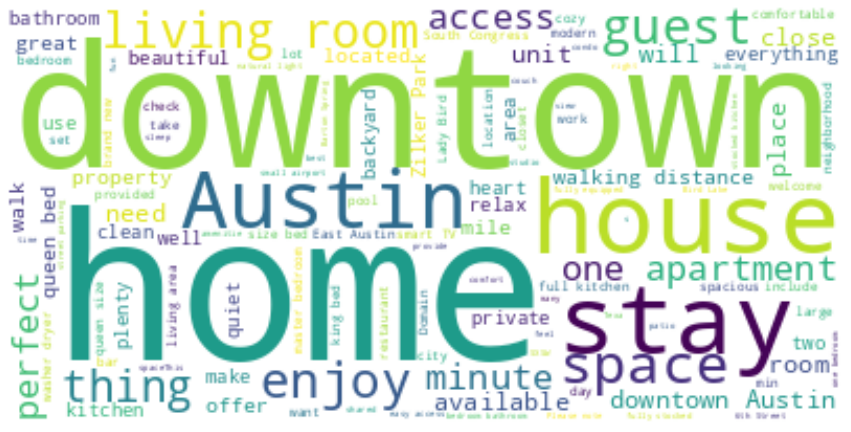

In [102]:
#Let's look at a word cloud for the description see what words are occurring the most
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_subset['description'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

What does the word cloud look like when comparing airbnb's that have 50% or more occupancy during the last 30 days versus ones that have less than 50% occupancy.

In [107]:
df_subset['percentage_aval_30'] = df_subset['availability_30'] / 30
df_50_percent_avail = df_subset.loc[df_subset['percentage_aval_30'] >= .5]
df_under_percent_avail = df_subset.loc[df_subset['percentage_aval_30'] <= .5]

In [109]:
df_under_percent_avail.shape

(9204, 53)

In [110]:
df_50_percent_avail.shape

(3002, 53)

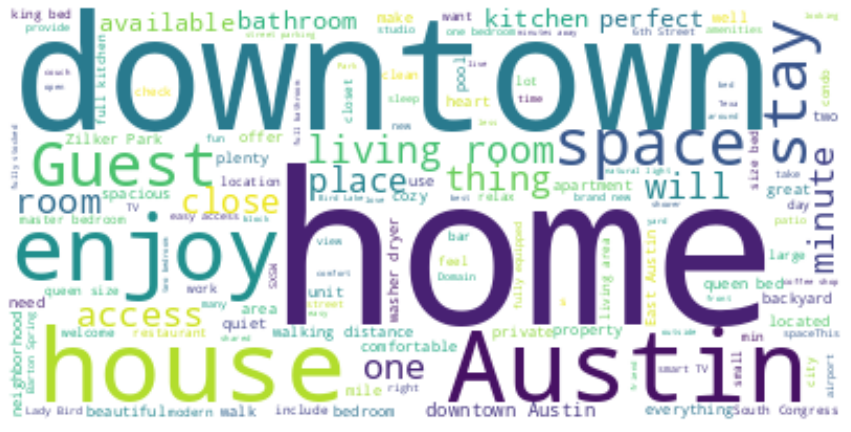

In [111]:
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_under_percent_avail['description'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

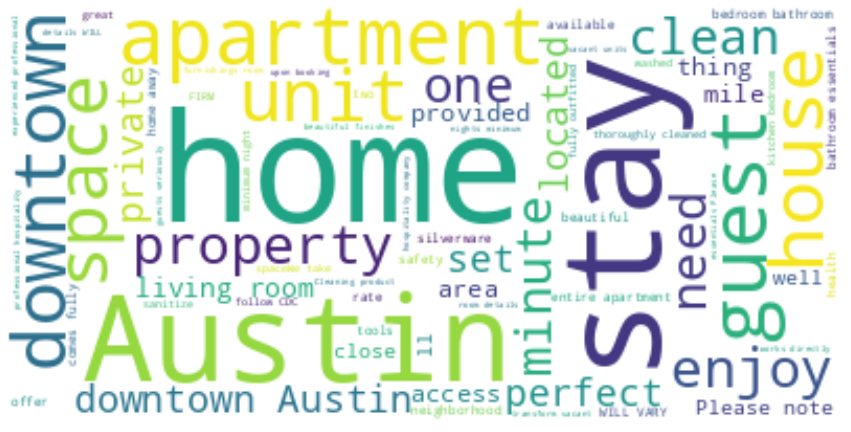

In [112]:
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_50_percent_avail['description'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's do a pairwise pearson correlation of the data to see what features have a strong correlation to our target variable (price)

<AxesSubplot:>

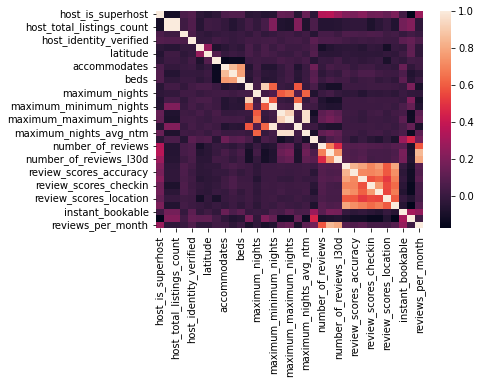

In [73]:
#heatmap visual for feature corelation
sns.heatmap(df_subset.corr())